In [1]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# breast_cancer = fetch_ucirepo(id=14) 
  
# # data (as pandas dataframes) 
# X = breast_cancer.data.features 
# y = breast_cancer.data.targets 
  
# # metadata 
# print(breast_cancer.metadata) 
  
# # variable information 
# print(breast_cancer.variables) 


## Starts from here (pandas seems to ruin the breast cancer CSV somehow)

In [2]:
# !wget https://archive.ics.uci.edu/static/public/14/breast+cancer.zip
# !mkdir "../datasets/breastcancer"
# !mkdir -p "../datasets/preprocessed_data/"
# !unzip breast+cancer.zip -d "../datasets/breastcancer"

--2024-10-12 01:55:15--  https://archive.ics.uci.edu/static/public/14/breast+cancer.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'breast+cancer.zip'

     0K ...                                                     139M=0s

2024-10-12 01:55:15 (139 MB/s) - 'breast+cancer.zip' saved [3549]

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file ../datasets/preprocessed_data/ already exists.
Error occurred while processing: ../datasets/preprocessed_data/.


Archive:  breast+cancer.zip
  inflating: ../datasets/breastcancer/Index  
  inflating: ../datasets/breastcancer/breast-cancer.data  
  inflating: ../datasets/breastcancer/breast-cancer.names  


In [3]:
import numpy as np
import csv
from dataset_utils import index_sizes_from_event_dict,get_cumulative_index_sizes
from dataset_utils import read_categorical_only_from_CSV


N = 286
D = 10
CSV_FILENAME = '../datasets/breastcancer/breast-cancer.data'
EXPORT_FILENAME = "../datasets/preprocessed_data/breastcancer_"


In [4]:
readable_labels_dict = {
    0 : 'recurrence',
    1 : 'age',
    2 : 'menopause',
    3 : 'tumor-size',
    4 : 'inv-nodes',
    5 : 'node-caps',
    6 : 'deg-malig',
    7 : 'breast',
    8 : 'breast-quad',
    9 : 'irradiation',
}
event_dictionary = {
    0 : ['no-recurrence-events', 'recurrence-events'],
    1 : ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
    2 : ['lt40', 'ge40', 'premeno'],
    3 : ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'],
    4 : ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'],
    5 : ['yes', 'no', '?'],
    6 : ['1','2','3'],
    7 : ['left', 'right'],
    8 : ['left_up', 'left_low', 'right_up', 'right_low', 'central', '?'],
    9 : ['yes', 'no']
}

In [5]:

I_ks = index_sizes_from_event_dict(event_dictionary)
print('I_ks    \t',I_ks)
cum_I_ks = get_cumulative_index_sizes(I_ks)
print('cum_I_ks \t',cum_I_ks)

I_ks    	 (2, 6, 3, 11, 7, 3, 3, 2, 6, 2)
cum_I_ks 	 [0, 2, 8, 11, 22, 29, 32, 35, 37, 43, 45]


In [6]:
X_arr = read_categorical_only_from_CSV(CSV_FILENAME,I_ks,N,event_dictionary)

(2, 6, 3, 11, 7, 3, 3, 2, 6, 2)
45
286


In [7]:
# np.save('onehotified_breastcancer.npy',X_arr)

In [8]:
from dataset_utils import save_onehotified_dataset_to_numpy

trn_X,tst_X = save_onehotified_dataset_to_numpy(EXPORT_FILENAME,X_arr,N,D,I_ks,cum_I_ks,readable_labels_dict,event_dictionary)

## some quick visualization

In [9]:
from dataset_utils import create_relevant_plot_categorical
plot_categorical = create_relevant_plot_categorical(X_arr,event_dictionary,I_ks,cum_I_ks)


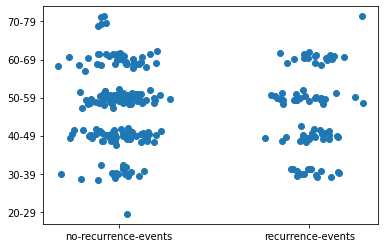

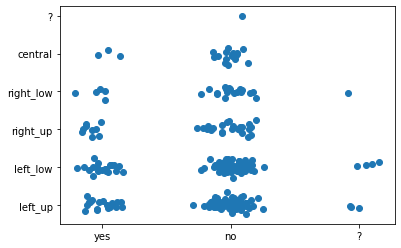

In [10]:

plot_categorical(0,1)
plot_categorical(5,8)

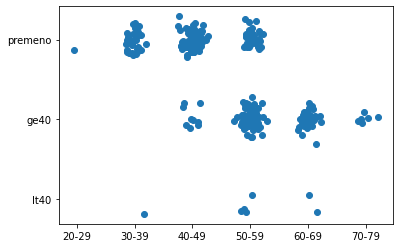

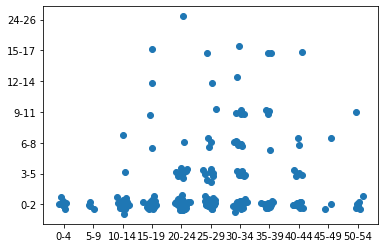

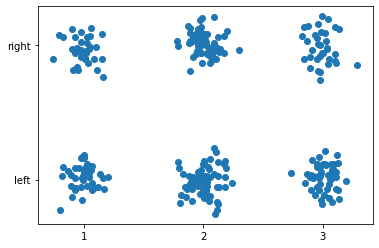

In [11]:

plot_categorical(1,2)
plot_categorical(3,4)
plot_categorical(6,7)